In [1]:
import pandas as pd
import numpy as np

In [4]:
# f_0 is whether molecule is musk or not
# f_1 is bag_id
musk = pd.read_csv("Musk1.csv", header=None, prefix="f_",sep=",")


# Descriptive Analysis

In [6]:
musk.groupby('f_1').describe()

f_0                                      f_2             ...   f_166  \
    count mean  std  min  25%  50%  75%  max count       mean  ...     75%   
f_1                                                            ...           
1     4.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   4.0  42.000000  ...    6.00   
2     4.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   4.0  42.000000  ...   14.00   
3     2.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   2.0  42.000000  ...    7.50   
4     3.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   3.0  42.666667  ...    7.00   
5     4.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   4.0  61.500000  ...    2.00   
..    ...  ...  ...  ...  ...  ...  ...  ...   ...        ...  ...     ...   
88   16.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  16.0   4.937500  ...   30.00   
89    4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   4.0  23.500000  ... -141.00   
90    4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   4.0  24.500000  ... -144.25   
91    3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   3.0  38.000000  ...  -25.50   
92    8.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   8.0  44.375000  ...    6.50   

           f_167                                                          
       max count       mean        std   min    25%   50%     75%    max  
f_1                                                                       
1      6.0   4.0  30.250000   0.500000  30.0  30.00  30.0   30.25   31.0  
2     14.0   4.0  26.500000   1.732051  25.0  25.75  26.0   26.75   29.0  
3     13.0   2.0  16.500000  58.689863 -25.0  -4.25  16.5   37.25   58.0  
4      7.0   3.0  32.333333   5.507571  27.0  29.50  32.0   35.00   38.0  
5     14.0   4.0  36.750000  66.339405 -27.0 -12.75  29.0   78.50  116.0  
..     ...   ...        ...        ...   ...    ...   ...     ...    ...  
88    37.0  16.0  32.875000  79.796303 -72.0 -22.25  23.5  120.25  124.0  
89  -141.0   4.0  65.000000  13.904436  52.0  53.50  65.0   76.50   78.0  
90  -142.0   4.0  65.500000  11.387127  52.0  59.50  65.5   71.50   79.0  
91   -10.0   3.0  12.000000  79.774683 -38.0 -34.00 -30.0   37.00  104.0  
92    12.0   8.0  41.125000  58.111807 -36.0 -16.50  72.0   79.50   97.0  

[92 rows x 1336 columns]

In [9]:
musk.groupby([ 'f_0']).describe()

f_1                                                        f_2  \
     count       mean        std   min   25%   50%   75%   max  count   
f_0                                                                     
0    269.0  73.052045  12.623313  48.0  60.0  79.0  82.0  92.0  269.0   
1    207.0  25.531401  13.413431   1.0  14.0  26.0  37.0  47.0  207.0   

                ... f_166        f_167                                    \
          mean  ...   75%   max  count       mean        std   min   25%   
f_0             ...                                                        
0    38.330855  ...   4.0  39.0  269.0  36.724907  61.146559 -72.0 -20.0   
1    39.251208  ...  12.0  82.0  207.0  29.801932  43.353642 -72.0  -6.0   

                        
      50%   75%    max  
f_0                     
0    51.0  88.0  235.0  
1    33.0  66.0  118.0  

[2 rows x 1336 columns]

# PCA for Visualization 

In [29]:
import plotly.express as px
from sklearn.decomposition import PCA

df = musk
features = musk.columns.values.tolist() 
features.remove('f_0')
features.remove('f_1')

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(6),
    color=df["f_0"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

# MDS for Visualization

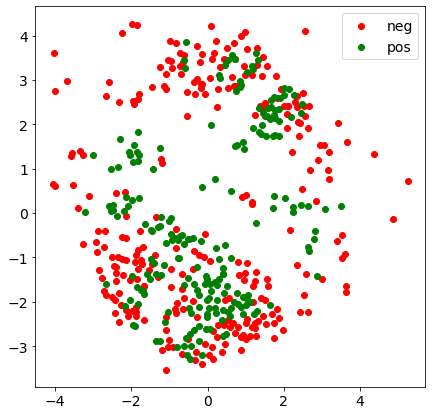

In [31]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

X = df[features]
Y = df['f_0']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

mds = MDS(2,random_state=0)
X_2d = mds.fit_transform(X_scaled)

colors = ['red','green']
labels = ['neg','pos']

plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)

for i in np.unique(Y):
    subset = X_2d[Y == i]

    x = [row[0] for row in subset]
    y = [row[1] for row in subset]
    plt.scatter(x,y,c=colors[i],label=labels[i])
plt.legend()
plt.show()

Because of the nature of Multiple Instance Learning, all of the data in the negative labeled bags is negative.
On the other hand, in the positive labeled bags, at least one positive data is required.

Bag representation of this problem can be an aggregation way of features. In order to make a good representation,
positive labeled bags can be represented by the aggregation of positive labeled data, while negative labeled data is 
the aggregation of negative data(which is all in the negative bag.).

In the homework definition, the average method for bag is proposed as example. It can be good for negative labeled
bags, however, positive labeled bags need to be considered more carefully.

I suggest a different representation method for positive labeled bags in method 1.

In [89]:
df = musk

df['f_168']= df.index  

# Alternative Representation 1 

In [109]:
class_0 = df[df['f_0']==0].groupby('f_0').apply(np.mean)


from scipy.spatial import distance

# the calculation of eucldean distance between center of label 0 and each data point
distances = []
for i in range(476):
    distances.append( distance.euclidean( df.iloc[i], class_0))

df = pd.concat([df, pd.DataFrame(distances, columns=['distance_class_0'])], axis = 1 )

# flag for maximum distance instance in the bag
flag = df[df['f_0']==1][['f_1', 'distance_class_0']].groupby('f_1').apply(np.max)
flag.index.name = None
flag['flag'] = 1

df = pd.merge(df, flag, how = 'left', left_on =['f_1', 'distance_class_0' ], right_on = ['f_1', 'distance_class_0' ] )


# for 0 label class, take average
# for 1 label class, calculate distance to the center of label 0 for each point
# select the instance which is the far from center of label 0, which can be considered as label 1 in that bag

# 0 label class
df_0 = df[df['f_0']==0]
# 1 label class
df_1 = df[df['f_0']==1]

df_0 = df_0.groupby('f_1').apply(np.mean).drop(columns = ['flag', 'distance_class_0'])

df_1 = df[df['flag']==1].drop(columns = ['flag', 'distance_class_0'])

In [213]:
train = pd.concat([df_0, df_1], axis = 0)

train_x=train.iloc[:,1:]
train_y=train.iloc[:,0]


# Random Forest for Alternative 1

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

random_forest = RandomForestClassifier(random_state = 77)

param_grid = {
             'max_depth': np.arange(5,20),
             'min_samples_leaf': np.arange(1,10),
             'n_estimators': np.arange(50, 500)
             }

random_forest_cv = RandomizedSearchCV(random_forest, param_grid, n_iter= 100, scoring='accuracy', cv=10, verbose=1)
random_forest_cv.fit(train_x, train_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=77),
                   n_iter=100,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 48

In [223]:
print(f"Best Score: {random_forest_cv.best_score_:.4f}")


Best Score: 0.9678


# KNN for Alternative 1 

In [228]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()


param_grid_knn = {'n_neighbors': np.arange(1,10),
             'p': np.arange(1,3)}

knn_cv = GridSearchCV(knn, param_grid_knn, scoring='accuracy', cv=10, verbose=1)
knn_cv_tuned = knn_cv.fit(train_x, train_y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [229]:
print(f"Best Score: {knn_cv_tuned.best_score_:.4f}")


Best Score: 0.8689


# Alternative Representation Method 2 
# Random Tree Representation

In [253]:
train = musk

train_x=train.iloc[:,2:]
train_y=train.iloc[:,0]

In [254]:
from sklearn.ensemble import RandomTreesEmbedding

rttune = RandomTreesEmbedding(max_depth=6, n_estimators=50,random_state=0)

In [255]:
randTreesTune=rttune.fit(train_x)

In [256]:
trainRep=randTreesTune.decision_path(train_x)

In [246]:
trainRep[0].todense()

matrix([[1, 0, 0, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]])

# Random Forest for Alternative 2

In [257]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(random_state = 77)

param_grid = {
             'max_depth': np.arange(5,20),
             'min_samples_leaf': np.arange(1,10),
             'n_estimators': np.arange(50, 500)
             }

random_forest_cv = RandomizedSearchCV(random_forest, param_grid, n_iter= 100, scoring='accuracy', cv=10, verbose=1)
random_forest_cv.fit(trainRep[0].todense(), train_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=77),
                   n_iter=100,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 48

In [260]:
print(f"Best Score: {random_forest_cv.best_score_:.4f}")


Best Score: 0.7986


# KNN for alternative 2 

In [261]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()


param_grid_knn = {'n_neighbors': np.arange(1,10),
             'p': np.arange(1,3)}

knn_cv = GridSearchCV(knn, param_grid_knn, scoring='accuracy', cv=10, verbose=1)
knn_cv_tuned = knn_cv.fit(trainRep[0].todense(), train_y)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [262]:
print(f"Best Score: {knn_cv_tuned.best_score_:.4f}")


Best Score: 0.7565


# Results and Comments # 

In [ ]:
The best method and representation pair is representation alternative 1 and random forest pair.
Accuracy is 0.9678.

In [263]:
import os

os.system('jupyter nbconvert --to html homework4.ipynb')

[NbConvertApp] Converting notebook homework4.ipynb to html
[NbConvertApp] Writing 711697 bytes to homework4.html


0